In [ ]:

from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
# Importing the data
import pandas as pd
import pandas as pd
import numpy as np
import keras
import tensorflow
import seaborn as sns
df=pd.read_csv("forestfires.csv")
df.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [ ]:
# Get information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [42]:
df.dtypes


month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

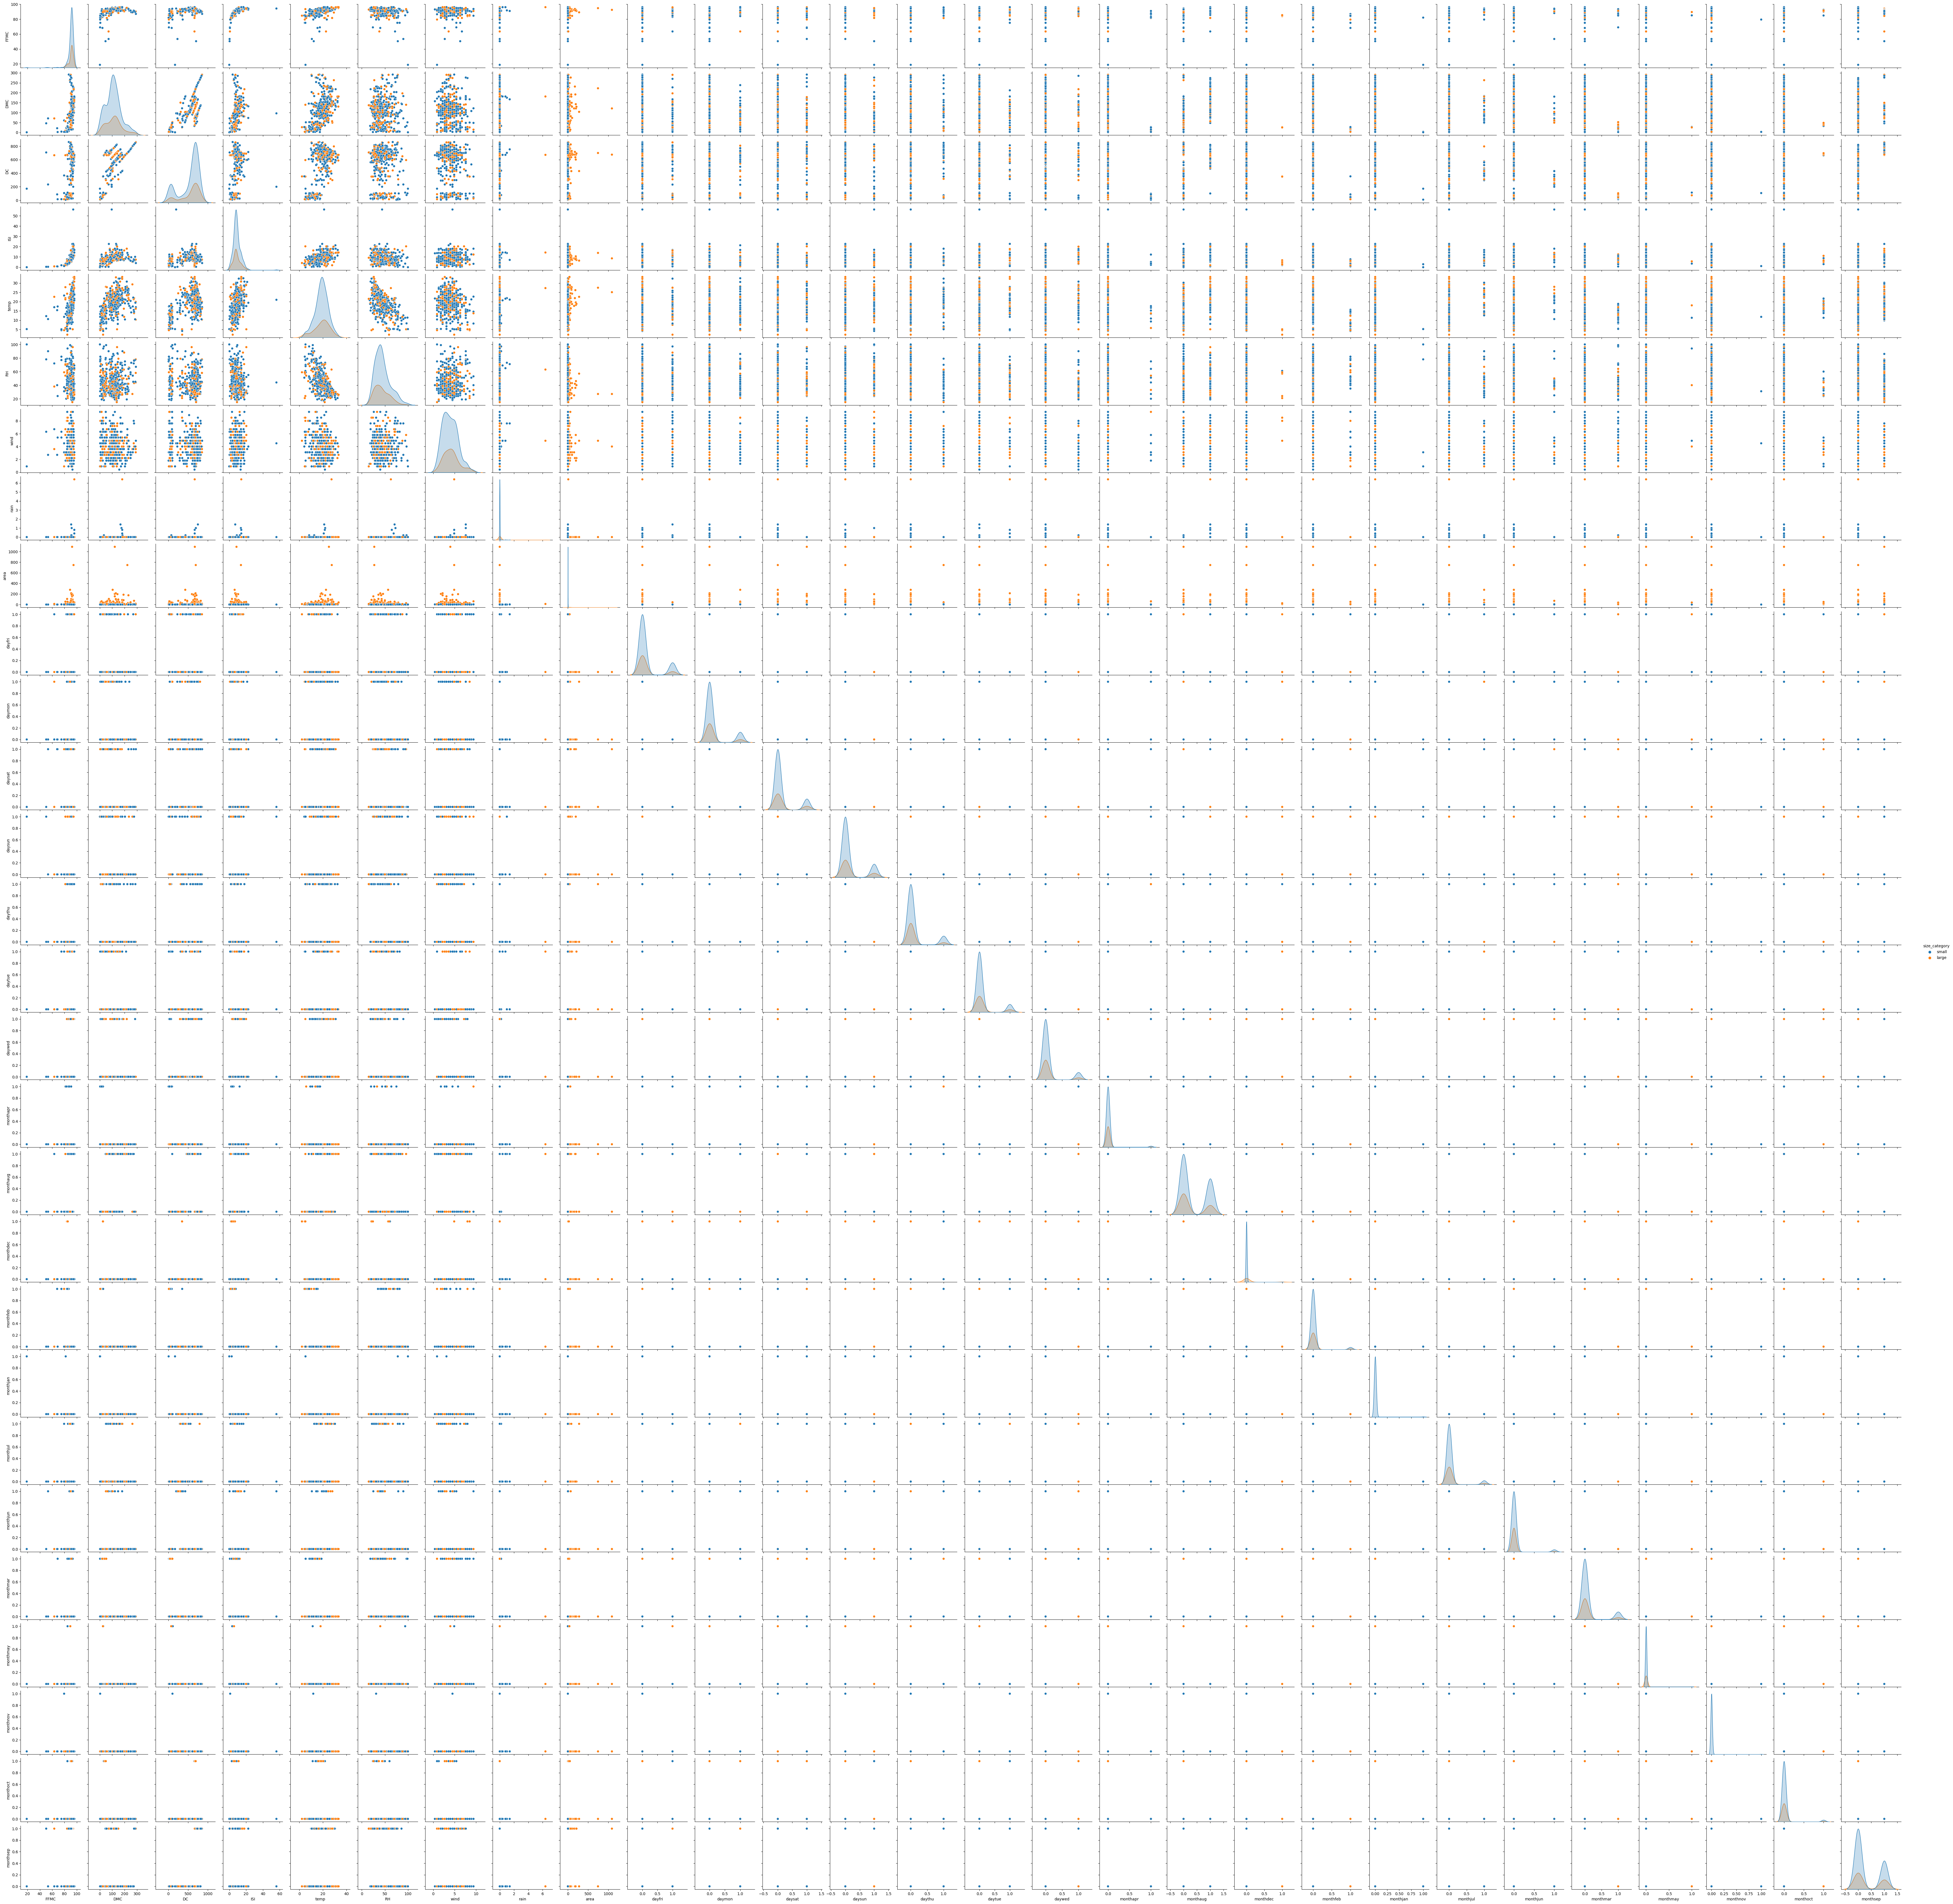

In [43]:
"""**Data Visvualization & EDA (Exploratory Data Analysis)**"""

# let's scatter plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data = df, hue = 'size_category')

<Axes: >

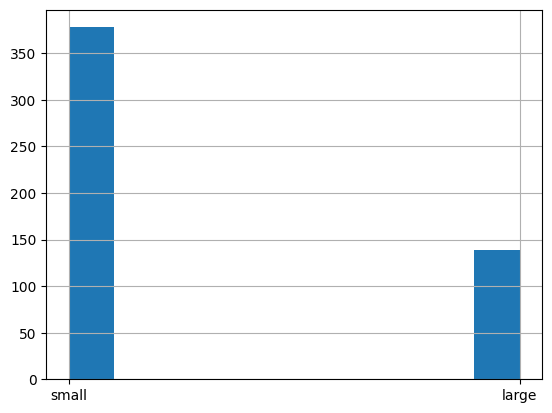

In [46]:
df["size_category"].hist()

In [51]:
data=df.drop(['month','day'],axis=1)

In [52]:
mapping = {'small': 1, 'large': 2}

In [54]:
df = df.replace(mapping)

In [55]:
x = np.array(df.iloc[:,0:28])
y = np.array(df.iloc[:,28])

In [56]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [57]:
x_norm = norm_func(x)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.2,stratify = y)

In [60]:
model = Sequential()
model.add(Dense(8, input_dim=28, activation='linear'))
model.add(Dense(4,  activation='tanh'))
model.add(Dense(1,  activation='sigmoid'))

In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
history=model.fit(x_train, y_train, validation_split=0.3, epochs=120, batch_size=10)

Epoch 1/120
29/29 [==============================] - 2s 11ms/step - loss: 0.4616 - accuracy: 0.7405 - val_loss: 0.3213 - val_accuracy: 0.7097
Epoch 2/120
29/29 [==============================] - 0s 4ms/step - loss: 0.2238 - accuracy: 0.7405 - val_loss: 0.0703 - val_accuracy: 0.7097
Epoch 3/120
29/29 [==============================] - 0s 5ms/step - loss: -0.0075 - accuracy: 0.7405 - val_loss: -0.1777 - val_accuracy: 0.7097
Epoch 4/120
29/29 [==============================] - 0s 4ms/step - loss: -0.2273 - accuracy: 0.7405 - val_loss: -0.3991 - val_accuracy: 0.7097
Epoch 5/120
29/29 [==============================] - 0s 4ms/step - loss: -0.4127 - accuracy: 0.7405 - val_loss: -0.5915 - val_accuracy: 0.7097
Epoch 6/120
29/29 [==============================] - 0s 4ms/step - loss: -0.5753 - accuracy: 0.7405 - val_loss: -0.7354 - val_accuracy: 0.7097
Epoch 7/120
29/29 [==============================] - 0s 4ms/step - loss: -0.6995 - accuracy: 0.7405 - val_loss: -0.8658 - val_accuracy: 0.7097
Ep

In [63]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 3ms/step - loss: -5.0456 - accuracy: 0.7312
accuracy: 73.12%


In [64]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 4ms/step - loss: -5.0543 - accuracy: 0.7308
accuracy: 73.08%
